In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from visualization_functions import *

In [15]:
# user-default-efs/model/model_experiments/onApr1NoRandomMinNum5NumExp5ProfBegin_allStates.csv
# prefix = 'onApr10_Corrected_Reward_Function_JLD_'
prefix = 'onApr10_Reward_Function_str_update_JLD_'
experiment_output_name = prefix + 'allStates'
training_data = prefix + 'trainingData'

In [16]:
experimentation_results = pd.read_csv('./' + experiment_output_name + '.csv') # output file of experiment results
print(experimentation_results.shape)
print(experimentation_results.groupby('Model Type')['Model Type'].count())
experimentation_results.head(3)

(585000, 19)
Model Type
easy                             45000
hard                             45000
medium                           45000
ours                             45000
oursRetrainGamma:10:Alpha:0      45000
oursRetrainGamma:50:Alpha:0      45000
oursRetrainGamma:90:Alpha:0      45000
oursRetrainGamma:90:Alpha:10     45000
oursRetrainGamma:90:Alpha:100    45000
oursRetrainGamma:90:Alpha:50     45000
oursRetrainGamma:99:Alpha:0      45000
random                           45000
simple                           45000
Name: Model Type, dtype: int64


,User Number,User Type,Embedding List,state,scaled_states,action,reward,reward_cols,embedding,game type,Question Number,Cumultive Reward,Accuracy Percent,Experiment Type,Experiment Run,Model Type,Reward Type,MinMax Type,Num Sessions Per User
0,1,proficient_beginner,"[1.0, 0, 0]","{'prev_is_correct': 1, 'questions_roll_ct': 1,...","{'prev_is_correct': 1, 'questions_roll_ct': 0,...",0,1,"{'earned_reward': 1, 'possible_reward': 1}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,1,1.00,1.000000,"simple, getRewards, Current",1,simple,getRewards,Current,5
1,1,proficient_beginner,"[1.0, 1.0, 0]","{'prev_is_correct': 1, 'questions_roll_ct': 2,...","{'prev_is_correct': 1, 'questions_roll_ct': 0....",1,2,"{'earned_reward': 3, 'possible_reward': 3}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,2,1.00,1.000000,"simple, getRewards, Current",1,simple,getRewards,Current,5
2,1,proficient_beginner,"[1.0, 1.0, 0.0]","{'prev_is_correct': 0, 'questions_roll_ct': 3,...","{'prev_is_correct': 0, 'questions_roll_ct': 0....",2,0,"{'earned_reward': 3, 'possible_reward': 4}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,3,0.75,0.666667,"simple, getRewards, Current",1,simple,getRewards,Current,5


In [17]:
train_df = pd.read_csv('./' + training_data + '.csv')
print(train_df.shape)
print(train_df.groupby('Model Type')['Model Type'].count())
train_df.head(3)

(31605, 15)
Model Type
oursRetrainGamma:10:Alpha:0      4515
oursRetrainGamma:50:Alpha:0      4515
oursRetrainGamma:90:Alpha:0      4515
oursRetrainGamma:90:Alpha:10     4515
oursRetrainGamma:90:Alpha:100    4515
oursRetrainGamma:90:Alpha:50     4515
oursRetrainGamma:99:Alpha:0      4515
Name: Model Type, dtype: int64


,Experiment,Experiment Run,Model Type,Reward Type,MinMax Type,Num Sessions Per User,Gamma,Retrain Num,Model Weights,Users in Training,Loss,Entropy,Avg Q-value,Avg Q-value variance,Alpha
0,"oursRetrainGamma:99:Alpha:0, getRewards, Current",1,oursRetrainGamma:99:Alpha:0,getRewards,Current,5,0.99,0,"Layer: fc3.bias\ntensor([0.8504, 0.8502, 0.850...",NaN,NaN,NaN,NaN,NaN,0.0
1,"oursRetrainGamma:99:Alpha:0, getRewards, Current",1,oursRetrainGamma:99:Alpha:0,getRewards,Current,5,0.99,1,"Layer: fc3.bias\ntensor([0.8504, 0.8502, 0.850...",No Retrain Needed,NaN,NaN,NaN,NaN,0.0
2,"oursRetrainGamma:99:Alpha:0, getRewards, Current",1,oursRetrainGamma:99:Alpha:0,getRewards,Current,5,0.99,2,"Layer: fc3.bias\ntensor([0.8539, 0.8502, 0.854...",[1 2],2.766013,0.955938,0.787014,0.85089,0.0


In [20]:
print(train_df.groupby('Model Type')['Entropy'].mean())

Model Type
oursRetrainGamma:10:Alpha:0      0.961225
oursRetrainGamma:50:Alpha:0      0.951676
oursRetrainGamma:90:Alpha:0      0.971656
oursRetrainGamma:90:Alpha:10     0.823730
oursRetrainGamma:90:Alpha:100    0.496609
oursRetrainGamma:90:Alpha:50     0.664543
oursRetrainGamma:99:Alpha:0      0.946690
Name: Entropy, dtype: float64


In [21]:
print(experimentation_results['Model Type'].unique())
print(experimentation_results['Reward Type'].unique())
print(experimentation_results['MinMax Type'].unique())

['simple' 'easy' 'medium' 'hard' 'random' 'ours'
 'oursRetrainGamma:99:Alpha:0' 'oursRetrainGamma:90:Alpha:0'
 'oursRetrainGamma:50:Alpha:0' 'oursRetrainGamma:10:Alpha:0'
 'oursRetrainGamma:90:Alpha:10' 'oursRetrainGamma:90:Alpha:50'
 'oursRetrainGamma:90:Alpha:100']
['getRewards' 'constInc' 'strPenalty']
['Current']


In [22]:
# filter to desired conditions
# experimentation_results = experimentation_results[experimentation_results['Reward Type'] == 'constInc']
experimentation_results = experimentation_results[experimentation_results['Reward Type'] == 'getRewards']
experimentation_results = experimentation_results[experimentation_results['MinMax Type'] == 'Current']
experimentation_results.head()

,User Number,User Type,Embedding List,state,scaled_states,action,reward,reward_cols,embedding,game type,Question Number,Cumultive Reward,Accuracy Percent,Experiment Type,Experiment Run,Model Type,Reward Type,MinMax Type,Num Sessions Per User
0,1,proficient_beginner,"[1.0, 0, 0]","{'prev_is_correct': 1, 'questions_roll_ct': 1,...","{'prev_is_correct': 1, 'questions_roll_ct': 0,...",0,1,"{'earned_reward': 1, 'possible_reward': 1}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,1,1.000000,1.000000,"simple, getRewards, Current",1,simple,getRewards,Current,5
1,1,proficient_beginner,"[1.0, 1.0, 0]","{'prev_is_correct': 1, 'questions_roll_ct': 2,...","{'prev_is_correct': 1, 'questions_roll_ct': 0....",1,2,"{'earned_reward': 3, 'possible_reward': 3}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,2,1.000000,1.000000,"simple, getRewards, Current",1,simple,getRewards,Current,5
2,1,proficient_beginner,"[1.0, 1.0, 0.0]","{'prev_is_correct': 0, 'questions_roll_ct': 3,...","{'prev_is_correct': 0, 'questions_roll_ct': 0....",2,0,"{'earned_reward': 3, 'possible_reward': 4}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,3,0.750000,0.666667,"simple, getRewards, Current",1,simple,getRewards,Current,5
3,1,proficient_beginner,"[1.0, 1.0, 0.0]","{'prev_is_correct': 1, 'questions_roll_ct': 4,...","{'prev_is_correct': 1, 'questions_roll_ct': 0....",1,2,"{'earned_reward': 5, 'possible_reward': 6}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,4,0.833333,0.750000,"simple, getRewards, Current",1,simple,getRewards,Current,5
4,1,proficient_beginner,"[1.0, 1.0, 0.0]","{'prev_is_correct': 0, 'questions_roll_ct': 5,...","{'prev_is_correct': 0, 'questions_roll_ct': 0....",2,0,"{'earned_reward': 5, 'possible_reward': 7}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,5,0.714286,0.600000,"simple, getRewards, Current",1,simple,getRewards,Current,5


In [23]:
question_max = max(experimentation_results['Question Number'])
final_session = experimentation_results[experimentation_results['Question Number']==question_max] 
final_session.groupby('Model Type')['Cumultive Reward'].mean()

Model Type
easy                             0.559328
hard                             0.719869
medium                           0.657376
ours                             0.715304
oursRetrainGamma:10:Alpha:0      0.717166
oursRetrainGamma:50:Alpha:0      0.718860
oursRetrainGamma:90:Alpha:0      0.724527
oursRetrainGamma:90:Alpha:10     0.716150
oursRetrainGamma:90:Alpha:100    0.717784
oursRetrainGamma:90:Alpha:50     0.726911
oursRetrainGamma:99:Alpha:0      0.727997
random                           0.664968
simple                           0.706310
Name: Cumultive Reward, dtype: float64

In [24]:
# Define the columns to keep and rename
cols_to_keep = ['User Number', 'User Type', 'action', 'reward', 'game type', 'Cumultive Reward', 'Accuracy Percent', 'Question Number', 'Model Type']
new_cols = {'User Number': 'User_Number', 'User Type': 'UserType', 'action': 'Difficulty', 'reward': 'Reward', 
            'game type': 'Game_Type', 'Cumultive Reward': 'cumulative_reward', 'Accuracy Percent': 'Accuracy_Percent', 
            'Question Number': 'Question_Number', 'Model Type': 'Model_Type'}

# Extract unique model types
model_types = experimentation_results['Model Type'].unique()

# Dictionary to store aggregated results
avg_cumulative_rewards = {}

# Loop through each model type, process the data, and store results
for model in model_types:
    filtered_data = experimentation_results[experimentation_results['Model Type'] == model][cols_to_keep].rename(columns=new_cols)
    avg_cumulative_rewards[model] = filtered_data.groupby('UserType')['cumulative_reward'].mean().rename(f"{model}_cumulative_reward")

# Combine all results into a single DataFrame
avg_cumulative_reward_new_all = pd.DataFrame(avg_cumulative_rewards)

avg_cumulative_reward_new_all

,simple,easy,medium,hard,random,ours,oursRetrainGamma:99:Alpha:0,oursRetrainGamma:90:Alpha:0,oursRetrainGamma:50:Alpha:0,oursRetrainGamma:10:Alpha:0,oursRetrainGamma:90:Alpha:10,oursRetrainGamma:90:Alpha:50,oursRetrainGamma:90:Alpha:100
UserType,,,,,,,,,,,,,
adaptive_learner,0.662118,0.482354,0.621305,0.783917,0.648181,0.776352,0.766486,0.773701,0.763105,0.737428,0.768311,0.783307,0.772883
cognitive_decline,0.519132,0.381955,0.534624,0.676337,0.508806,0.656205,0.630093,0.653600,0.623787,0.602137,0.660378,0.643647,0.666424
expert,0.932606,0.741123,0.872001,0.941503,0.862559,0.943166,0.928214,0.933371,0.921524,0.939478,0.922373,0.944062,0.938436
intermediate,0.698164,0.470478,0.645312,0.788263,0.651662,0.780021,0.765006,0.772748,0.745102,0.738237,0.759110,0.790093,0.783141
proficient_beginner,0.493538,0.757456,0.456680,0.181356,0.505376,0.151002,0.243607,0.271010,0.276895,0.297465,0.200622,0.187294,0.158924
steady,0.746509,0.467259,0.691520,0.830682,0.686228,0.821751,0.833851,0.834741,0.829771,0.823371,0.814629,0.832085,0.842151


In [25]:
print('Included Models: ', list(experimentation_results['Model Type'].unique()))

print('Included Rewards Types: ', experimentation_results['Reward Type'].unique())

print('Max num questions answered by a single user: ', max(experimentation_results['Question Number']))

Included Models:  ['simple', 'easy', 'medium', 'hard', 'random', 'ours', 'oursRetrainGamma:99:Alpha:0', 'oursRetrainGamma:90:Alpha:0', 'oursRetrainGamma:50:Alpha:0', 'oursRetrainGamma:10:Alpha:0', 'oursRetrainGamma:90:Alpha:10', 'oursRetrainGamma:90:Alpha:50', 'oursRetrainGamma:90:Alpha:100']
Included Rewards Types:  ['getRewards']
Max num questions answered by a single user:  50


Plot saved to: onApr10_Reward_Function_str_update_JLD_allStates/spider_reward.png


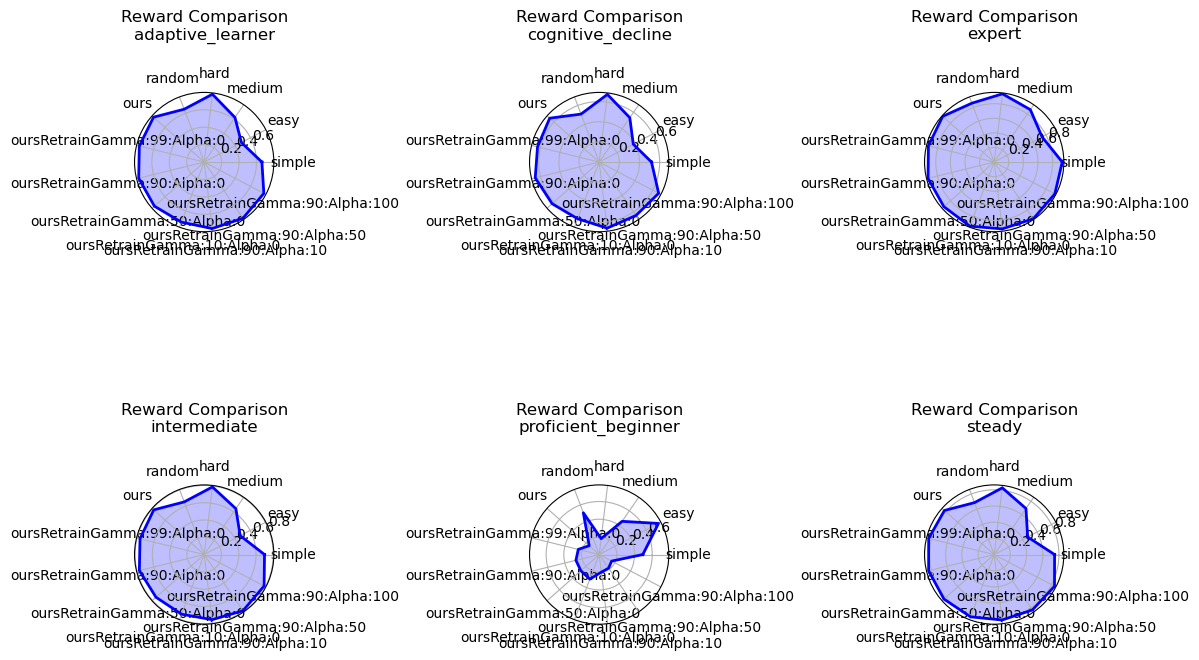

Plot saved to: onApr10_Reward_Function_str_update_JLD_allStates/bar_reward.png


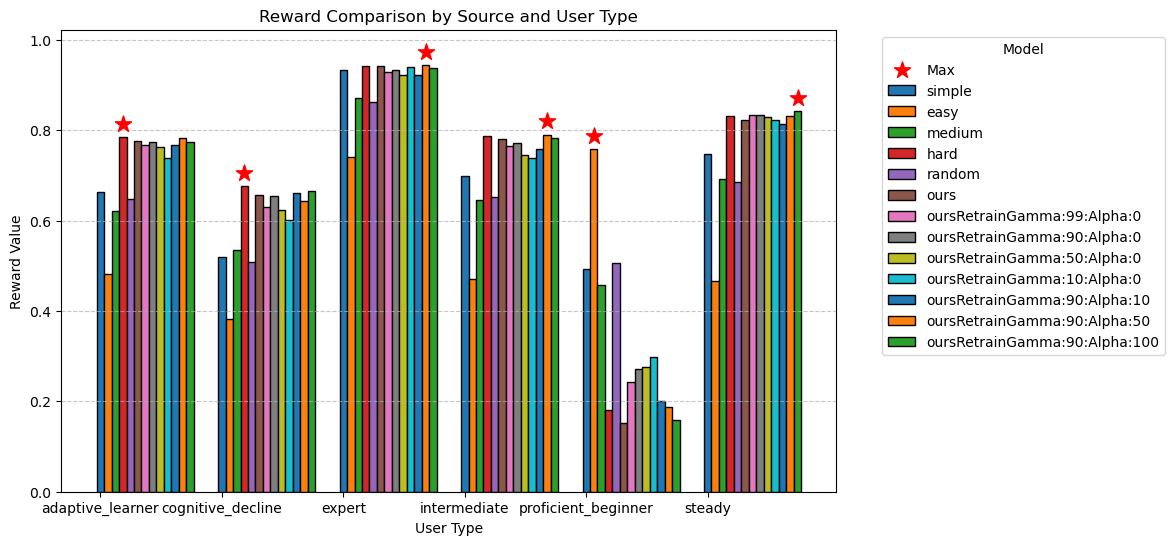

Plot saved to: onApr10_Reward_Function_str_update_JLD_allStates/violin_difficulty.png


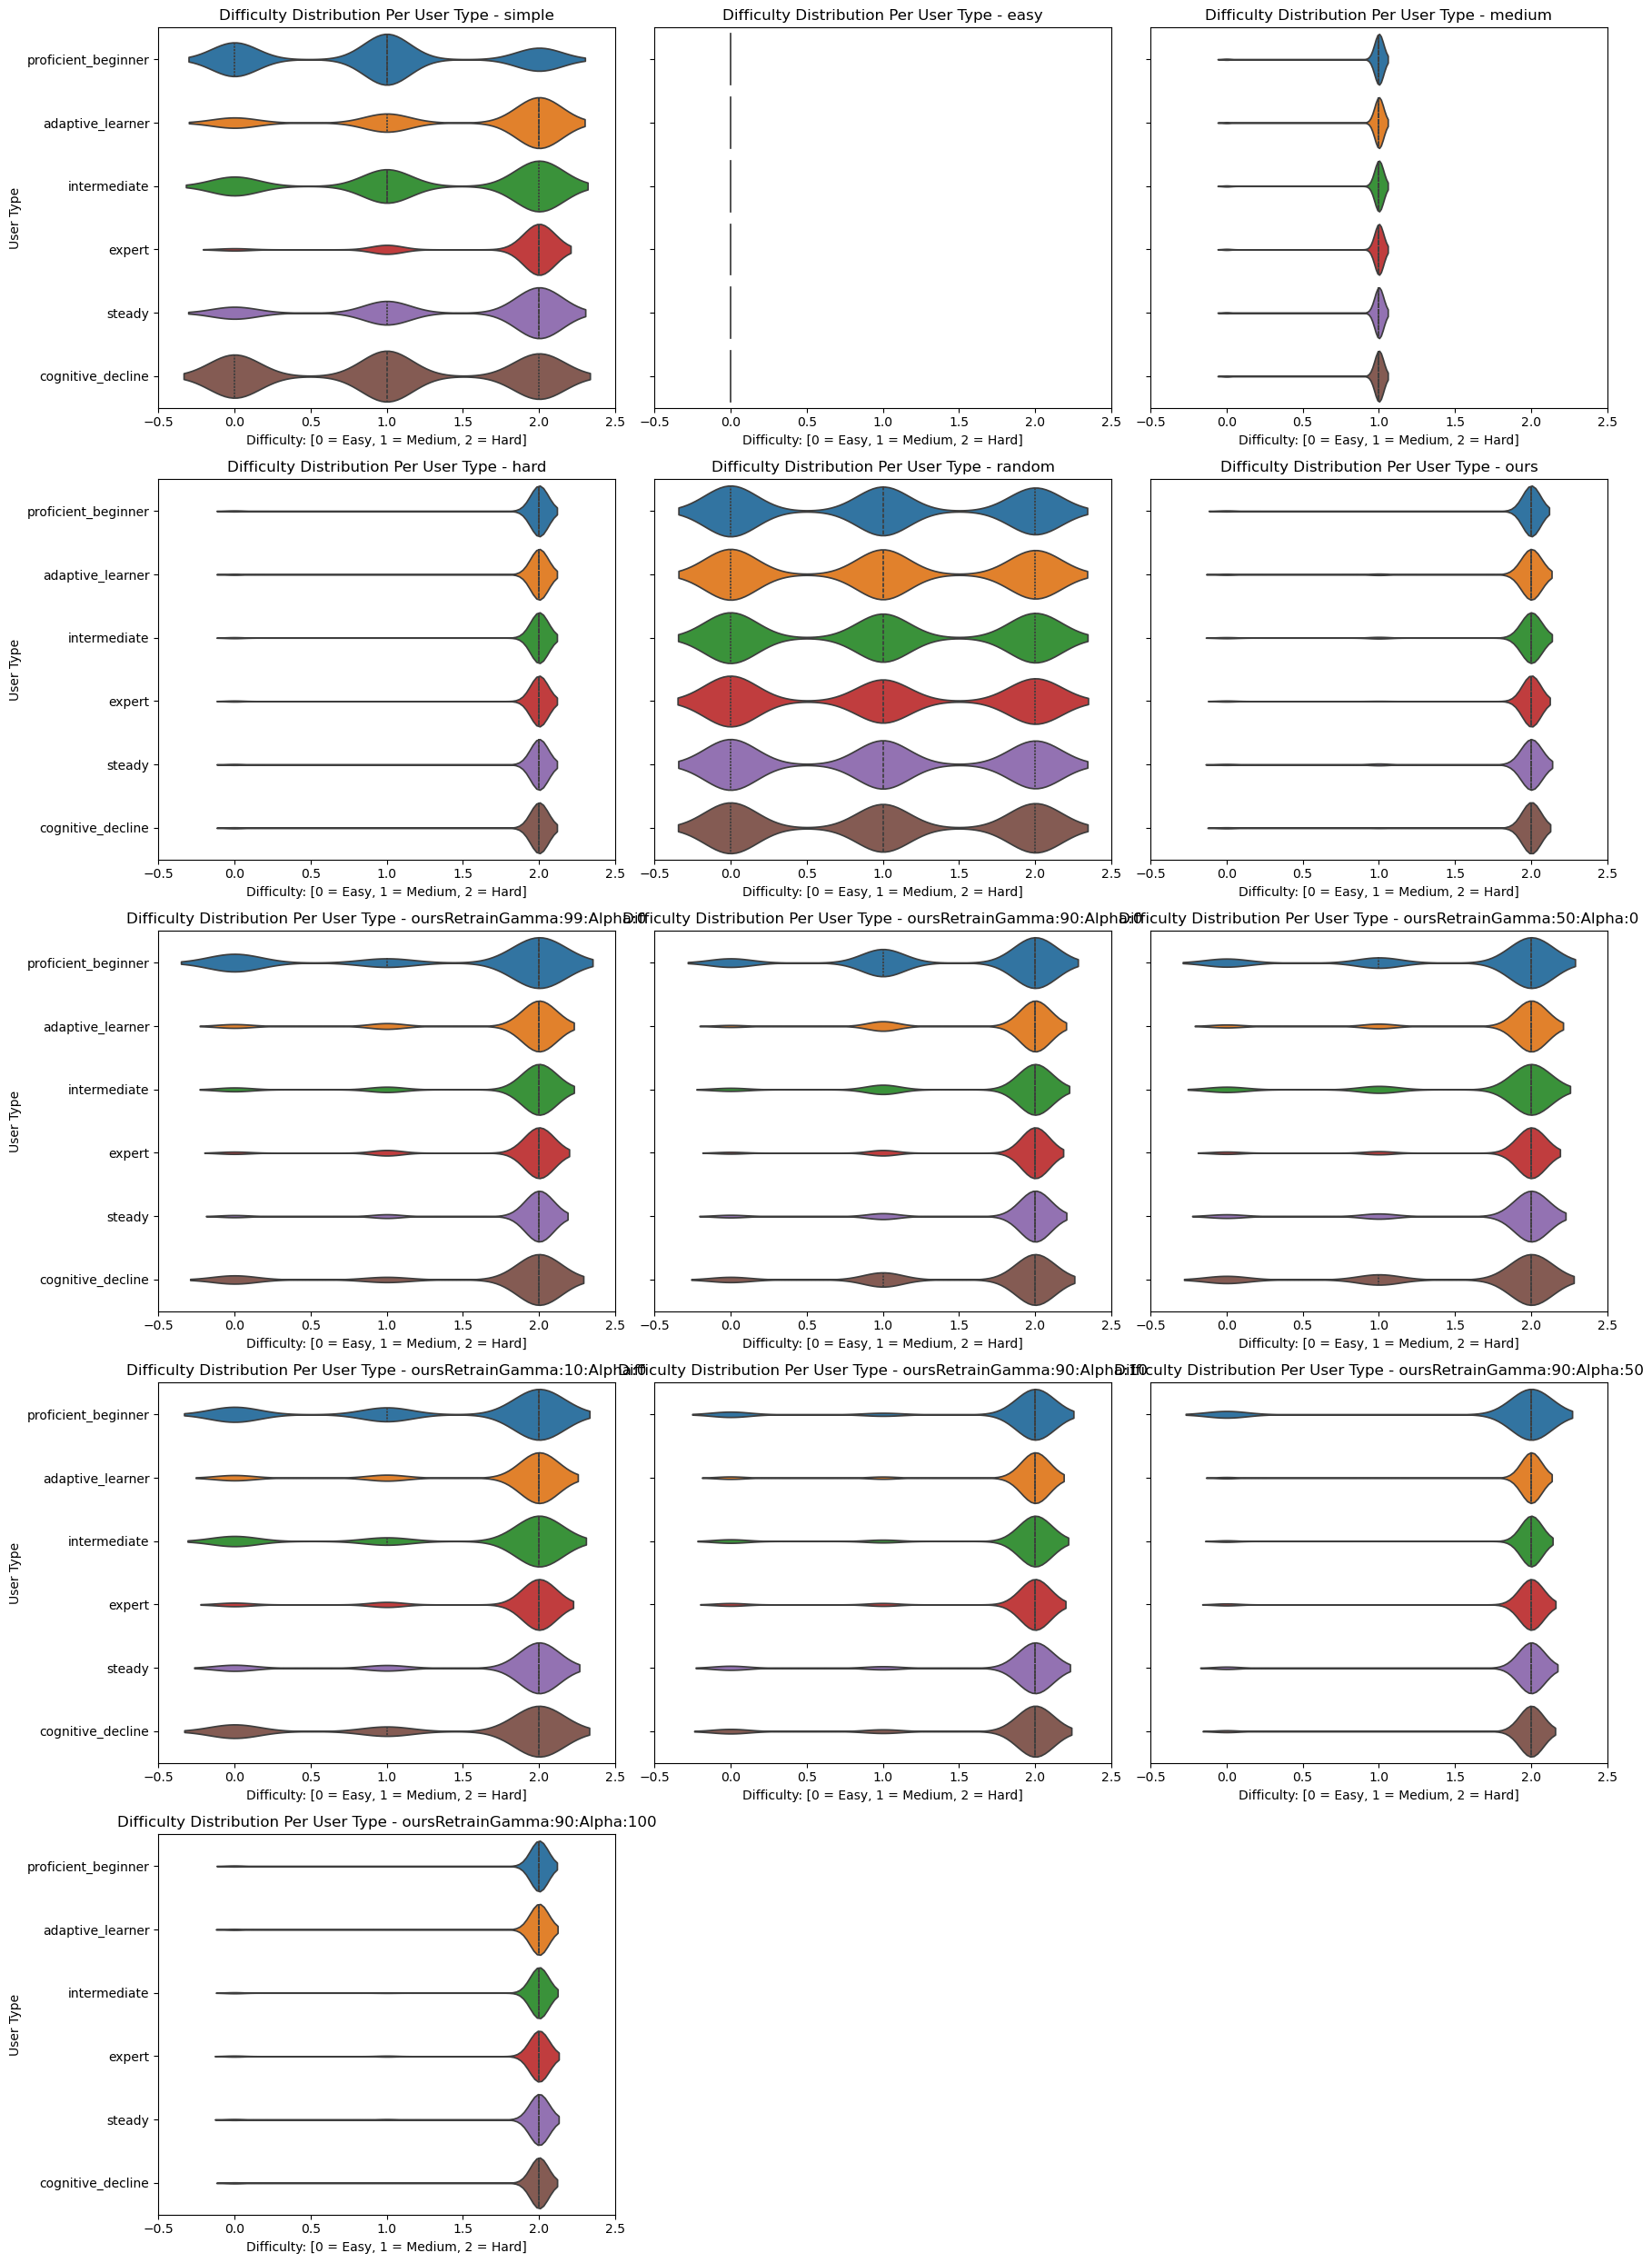

Plot saved to: onApr10_Reward_Function_str_update_JLD_allStates/violin_reward.png


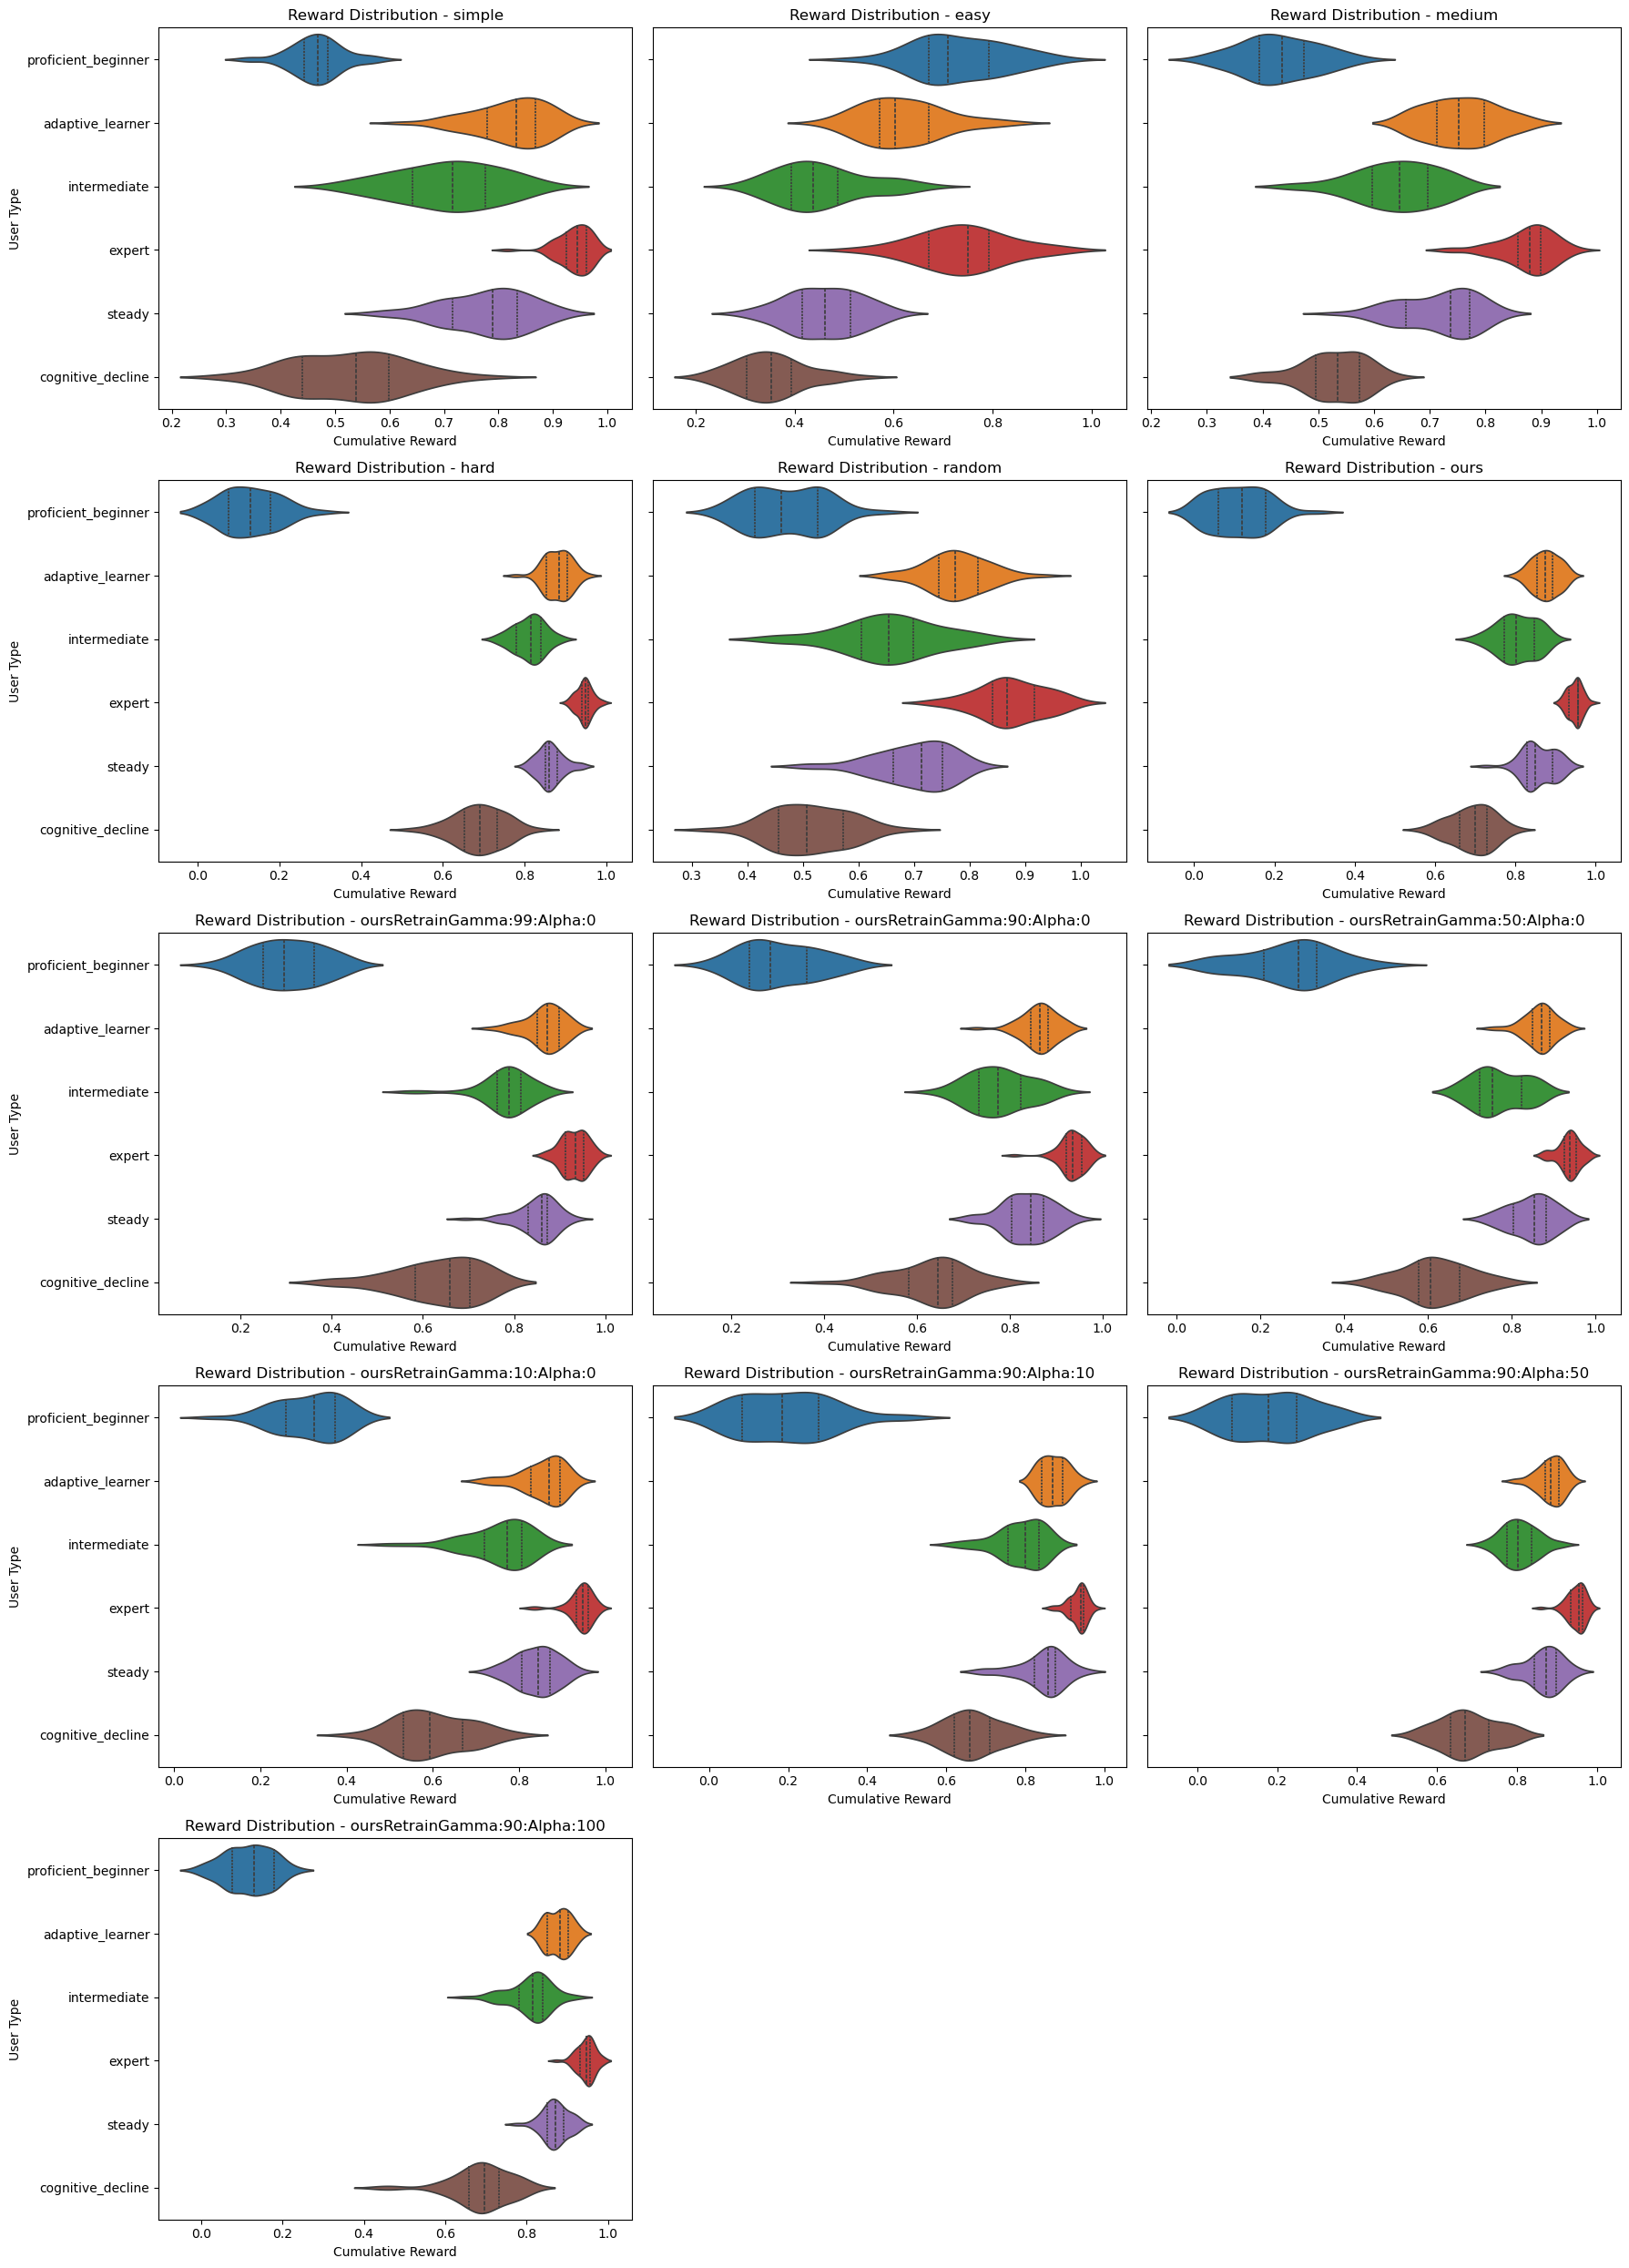

In [26]:
visualize_reward_new(avg_cumulative_reward_new_all, experiment_output_name)

# Dictionary to store filtered data for each model type
filtered_data = {
    model: experimentation_results[experimentation_results['Model Type'] == model][cols_to_keep].rename(columns=new_cols)
    for model in model_types
}
max_questions = max(experimentation_results['Question Number'])

violin_difficulty_multi(filtered_data, experiment_output_name)
violin_reward_multi(filtered_data, max_questions, experiment_output_name)

In [27]:
avg_cumulative_reward_new_all.to_csv('./' + experiment_output_name + '/average_cum_reward.csv')

In [30]:
# entropy
grouped_df = train_df.groupby(['Experiment Run', 'Model Type'])['Entropy'].mean()
grouped_df

# sns.lineplot(data=grouped_df)

Experiment Run  Model Type                   
1               oursRetrainGamma:10:Alpha:0      0.939345
                oursRetrainGamma:50:Alpha:0      0.990187
                oursRetrainGamma:90:Alpha:0      0.962989
                oursRetrainGamma:90:Alpha:10     0.814490
                oursRetrainGamma:90:Alpha:100    0.561904
                oursRetrainGamma:90:Alpha:50     0.772744
                oursRetrainGamma:99:Alpha:0      0.985890
2               oursRetrainGamma:10:Alpha:0      0.940493
                oursRetrainGamma:50:Alpha:0      0.917886
                oursRetrainGamma:90:Alpha:0      0.969354
                oursRetrainGamma:90:Alpha:10     0.835649
                oursRetrainGamma:90:Alpha:100    0.386871
                oursRetrainGamma:90:Alpha:50     0.651965
                oursRetrainGamma:99:Alpha:0      0.948880
3               oursRetrainGamma:10:Alpha:0      0.990027
                oursRetrainGamma:50:Alpha:0      0.990648
                oursRetrai